In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
pickleFile = open("hw2_p2.pkl","rb")
data = pd.read_pickle(pickleFile)
data

{'x': array([ 6.91789750e-01, -1.33036738e-01, -7.12424715e-01, -8.70378042e-01,
         9.93521520e-01,  6.45407766e-01, -9.05586253e-01, -9.39132772e-01,
        -1.93422676e-01,  5.94012590e-01, -7.37081849e-01, -9.52800510e-01,
         7.88683686e-01, -7.68151122e-01, -8.42960901e-01, -5.10262916e-01,
        -3.38553980e-01, -4.89515341e-01,  2.96801683e-01,  6.18715938e-01,
         4.42790855e-01,  4.05782998e-01,  2.68592960e-01,  7.49038032e-02,
         4.68742800e-01, -1.67318766e-02, -4.92825944e-01,  9.32213290e-01,
         8.32522221e-01, -2.53078559e-01, -4.30788978e-01, -3.93838313e-01,
         7.89823987e-01, -2.11534710e-01, -2.75469132e-01,  1.24628735e-01,
        -3.93850268e-02, -6.71075115e-01,  3.71279325e-01, -6.87811333e-01,
        -6.81549428e-01, -2.75383024e-01,  7.22883531e-02,  3.54829788e-01,
        -9.93302252e-01, -7.95483609e-01, -8.48899794e-01, -2.06877921e-01,
        -8.41133466e-04, -9.22033370e-02,  5.37635471e-01, -7.22072733e-01,
       

In [ ]:
x = np.array(data["x"]).reshape(-1, 1)
y = np.array(data["y"]).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

## Regression helper functions

In [ ]:
def create_polynomial_features(x, degree):
    X_poly = np.ones((x.shape[0], 1))
    for i in range(1, degree + 1):
        X_poly = np.hstack((X_poly, x**i))
    return X_poly

def predict(X, w):
    return X @ w

## Part-1

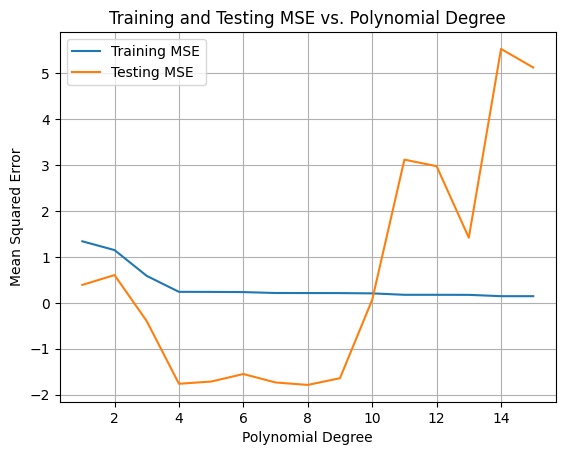

+--------+--------------+-------------+
| Degree | Training MSE | Testing MSE |
+--------+--------------+-------------+
|   1    |    1.341     |    1.479    |
|   2    |    1.150     |    1.832    |
|   3    |    0.587     |    0.672    |
|   4    |    0.240     |    0.172    |
|   5    |    0.239     |    0.180    |
|   6    |    0.235     |    0.212    |
|   7    |    0.215     |    0.176    |
|   8    |    0.214     |    0.167    |
|   9    |    0.213     |    0.194    |
|   10   |    0.207     |    1.069    |
|   11   |    0.176     |    22.664   |
|   12   |    0.175     |    19.659   |
|   13   |    0.174     |    4.136    |
|   14   |    0.145     |   253.023   |
|   15   |    0.145     |   168.820   |
+--------+--------------+-------------+


In [ ]:
def fit_polynomial_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


train_errors = []
test_errors = []
degrees = range(1, 16)

for degree in degrees:
    X_train_poly = create_polynomial_features(x_train, degree)
    X_test_poly = create_polynomial_features(x_test, degree)
    w = fit_polynomial_regression(X_train_poly, y_train)
    y_train_pred = predict(X_train_poly, w)
    y_test_pred = predict(X_test_poly, w)
    train_errors.append(mse(y_train, y_train_pred))
    test_errors.append(mse(y_test, y_test_pred))

plt.plot(degrees, train_errors, label="Training MSE")
plt.plot(degrees, np.log(test_errors), label="Testing MSE")
# NOTE:
# I have taken log of test errors as they increase sharply towards the end, thus making it hard for us to understand the results.
# Logically the conclusion remains the same.

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Testing MSE vs. Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()

fields = ["Degree", "Training MSE", "Testing MSE"]
table = PrettyTable()
table.field_names = fields
for d, train, test in zip(degrees, train_errors, test_errors):
    table.add_row([d, f"{train:.3f}", f"{test:.3f}"])
print(table)

## Parts 2, 3, 4, 5

+--------+------------------------------+----------------------------------------------------------------------+
| Degree | Mean Training MSE per degree | Std. Dev. of the abs. diff. between train and test errors per degree |
+--------+------------------------------+----------------------------------------------------------------------+
|   1    |            1.309             |                                0.288                                 |
|   2    |            0.613             |                                0.565                                 |
|   3    |            0.196             |                                0.325                                 |
|   4    |            0.094             |                                0.267                                 |
|   5    |            0.068             |                                0.244                                 |
|   6    |            0.042             |                                0.169                  

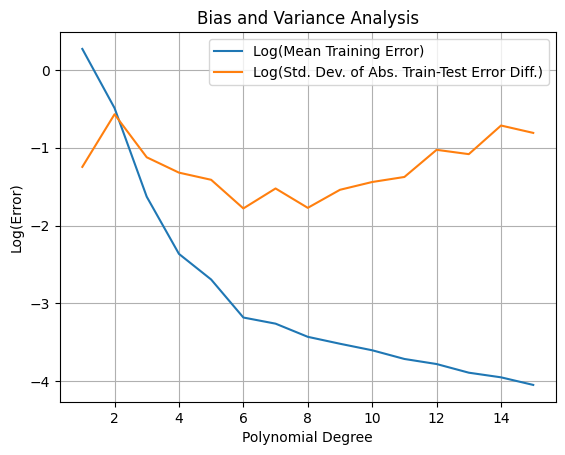

In [ ]:
def gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n, 1))
    for epoch in range(epochs):
        gradients = 1/m * X.T @ (X @ w - y)
        w -= lr * gradients
    return w


cumulative_train_errors = np.zeros(max(degrees))
cumulative_abs_error_diffs = [[] for degree in degrees]
lr = 0.1
epochs = 1000

for epoch in range(epochs):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=epoch)
    for degree in degrees:
        X_train_poly = create_polynomial_features(x_train, degree)
        X_test_poly = create_polynomial_features(x_test, degree)
        scaler = StandardScaler().fit(X_train_poly[:, 1:])
        X_train_poly[:, 1:] = scaler.transform(X_train_poly[:, 1:])
        X_test_poly[:, 1:] = scaler.transform(X_test_poly[:, 1:])
        w = gradient_descent(X_train_poly, y_train, lr, 150)
        y_train_pred = predict(X_train_poly, w)
        y_test_pred = predict(X_test_poly, w)
        train_error = mse(y_train, y_train_pred)
        test_error = mse(y_test, y_test_pred)
        cumulative_train_errors[degree-1] += train_error / degree
        cumulative_abs_error_diffs[degree-1].append(abs(train_error - test_error))

mean_train_errors = cumulative_train_errors / epochs
#std_abs_error_diffs = [np.std(diff) for diff in cumulative_abs_error_diffs]
std_abs_error_diffs = np.std(cumulative_abs_error_diffs, axis = 1)

fields = ["Degree", "Mean Training MSE per degree", "Std. Dev. of the abs. diff. between train and test errors per degree"]
table = PrettyTable()
table.field_names = fields
for d, train, test in zip(degrees, mean_train_errors, std_abs_error_diffs):
    table.add_row([d, f"{train:.3f}", f"{test:.3f}"])
print(table)

plt.plot(degrees, np.log(mean_train_errors), label="Log(Mean Training Error)")
plt.plot(degrees, np.log(std_abs_error_diffs), label="Log(Std. Dev. of Abs. Train-Test Error Diff.)")
plt.xlabel("Polynomial Degree")
plt.ylabel("Log(Error)")
plt.title("Bias and Variance Analysis")
plt.legend()
plt.grid(True)
plt.show()

Based on the plots obtained for single shot and 1000-run approaches, we can see that a degree of 4 would be suitable based on the first plot and a degree of 8 would be suitable based on the second plot, in order to balance the trade-off between bias and variance.

However, if we consider the intersection of the curves, 10 and 2 would be the answers for choice of degree respectively.